# Distributed Computing with Dask: Step-by-step Exercise

Mahdi Farnaghi and Mahdi Khodadadzadeh

October 2024


**Objective: Explore distributed computing concepts using Dask for Exploratory Data Analysis (EDA).**

## Dataset

### Description 

In this exercise, we will be using the **Iris dataset**, one of the most well-known datasets in data science. The Iris dataset contains 150 samples from three species of Iris flowers: *Iris setosa*, *Iris virginica*, and *Iris versicolor*. Each sample has four features:

1. **Sepal length** (in cm)
2. **Sepal width** (in cm)
3. **Petal length** (in cm)
4. **Petal width** (in cm)

These features describe the physical characteristics of the flowers, which are used to classify the species. The dataset is widely used for classification tasks and exploratory data analysis (EDA).

---

### Dataset Columns:

- **sepal length**: Length of the sepal (in cm).
- **sepal width**: Width of the sepal (in cm).
- **petal length**: Length of the petal (in cm).
- **petal width**: Width of the petal (in cm).
- **species**: The species of the Iris flower (*Iris setosa*, *Iris virginica*, or *Iris versicolor*).

---

We will use this dataset to explore how Dask can be applied to distributed computing tasks for data analysis.

---

## Installation

In [1]:
#!pip install -q "dask[distributed]" --upgrade 

In [2]:
#!pip install -q dask[dataframe]

In [3]:
#!pip install -q scipy

## Step 1: Setting up the Dask Client

Task: Initialize a Dask Client to enable parallel and distributed computing.

In [4]:
from dask.distributed import Client
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 9
Total threads: 72,Total memory: 736.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:46415,Workers: 9
Dashboard: http://127.0.0.1:8787/status,Total threads: 72
Started: Just now,Total memory: 736.00 GiB
Comm: tcp://127.0.0.1:41231,Total threads: 8
Dashboard: http://127.0.0.1:37013/status,Memory: 81.78 GiB
Nanny: tcp://127.0.0.1:44023,


## Step 2: Load the dataset using Dask

Task: Load the Iris dataset using `dask.read_csv`.

Instruction: Use Dask's `read_csv` to load the Iris dataset. This is similar to how you use `pandas.read_csv`. Print the first 5 rows of the dataset.

In [5]:
import dask
import dask.dataframe as dd
import os

In [6]:
file_path = os.path.join("EDA_iris.txt")

ddf = dd.read_csv(
    file_path,
    delimiter=',',
    header=None,
    names=['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species'],
    dtype={"TailNum": str, "CRSElapsedTime": float, "Cancelled": bool}
)

ddf.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Step 3: Set the Index

Task: Set the species as the index for the dataframe.

Instruction: Change the index of the dataframe to 'species' and check how the dataset looks after the change.

In [7]:
ddf = ddf.set_index('Species')

ddf

,SepalLength,SepalWidth,PetalLength,PetalWidth
npartitions=1,,,,
Iris-setosa,float64,float64,float64,float64
Iris-virginica,...,...,...,...


In [8]:
ddf.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
Species,,,,
Iris-setosa,5.1,3.5,1.4,0.2
Iris-setosa,4.9,3.0,1.4,0.2
Iris-setosa,4.7,3.2,1.3,0.2
Iris-setosa,4.6,3.1,1.5,0.2
Iris-setosa,5.0,3.6,1.4,0.2


## Step 6: Getting Data Information

Task: Retrieve information about the dataframe's columns and types.

Instruction: Use .info() to explore the dataframe's structure.

In [9]:
ddf.info()

<class 'dask.dataframe.core.DataFrame'>
Columns: 4 entries, SepalLength to PetalWidth
dtypes: float64(4)

Task: Compute descriptive statistics for the dataset.

Instruction: Use .describe() to calculate statistics for each column and ensure that you trigger computation with .compute().

In [10]:
ddf.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
npartitions=1,,,,
,float64,float64,float64,float64
,...,...,...,...


## Step 4: Slicing the Dataset

Task: Perform slicing on the dataframe to select specific rows.

Instruction: Select a few rows from the dataframe and compute them using Dask's parallel computation.

In [11]:
#Slicing Iris-Virginica
ddf_slice = ddf.loc['Iris-virginica']
# Trigger computation
computed_ddf = ddf_slice.compute()

computed_ddf.head(5)

,SepalLength,SepalWidth,PetalLength,PetalWidth
Species,,,,
Iris-virginica,6.3,3.3,6.0,2.5
Iris-virginica,5.8,2.7,5.1,1.9
Iris-virginica,7.1,3.0,5.9,2.1
Iris-virginica,6.3,2.9,5.6,1.8
Iris-virginica,6.5,3.0,5.8,2.2


## Step 5: Mean, Quantiles, and Variance

Task: Compute the mean, quantiles, and variance of the dataset.

Instruction: Calculate the mean, quantiles, and variance of the dataset.

In [12]:
ddf.describe().compute()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [13]:
variance_values = ddf.var().compute()
variance_values

SepalLength    0.685694
SepalWidth     0.188004
PetalLength    3.113179
PetalWidth     0.582414
dtype: float64

## Step 6: Data Visualization

Task: Visualize the distribution of columns using histograms and density plots.

Instruction: Plot the histogram and kernel density estimate (KDE) for the 'sepal length' column.

In [14]:
sepal_length = ddf['SepalLength'].compute()

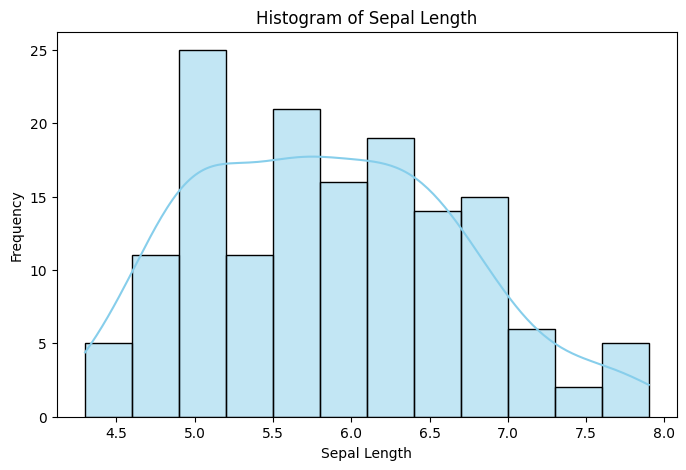

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(sepal_length, kde=True, bins=12, color='skyblue')
plt.title('Histogram of Sepal Length')
plt.xlabel('Sepal Length')
plt.ylabel('Frequency')
plt.show()

## Step 7: Pie and Bar Charts

Task: Create a pie chart and bar chart based on species count.

Instruction: Visualize the species distribution using a pie chart and a bar chart.

In [16]:
species_count = ddf.index.value_counts().compute()

print(species_count)

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64


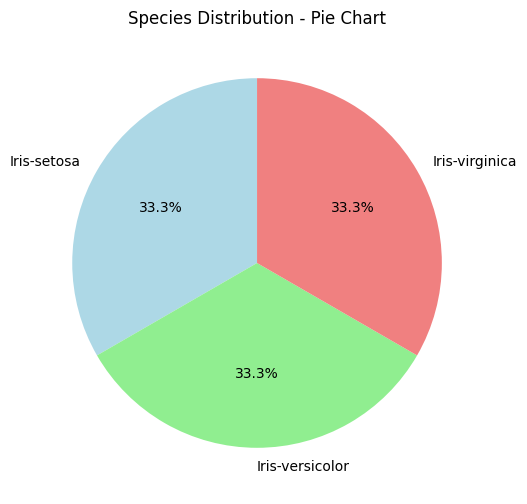

In [17]:
plt.figure(figsize=(6, 6))
plt.pie(species_count, labels=species_count.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Species Distribution - Pie Chart')
plt.show()

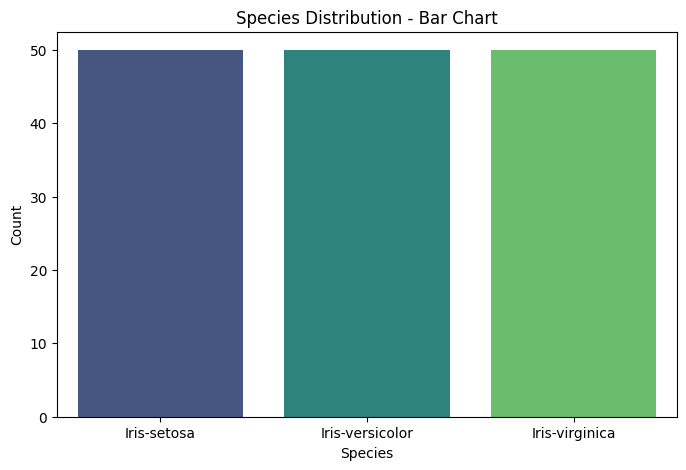

In [18]:
plt.figure(figsize=(8, 5))
sns.barplot(x=species_count.index, y=species_count.values, palette="viridis")
plt.title('Species Distribution - Bar Chart')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

## Step 8: Covariance and Correlation

Task: Compute the covariance and correlation of the dataset.

Instruction: Calculate and display the covariance and correlation between columns.

In [19]:
cov_matrix = ddf.cov().compute()

print(cov_matrix)

             SepalLength  SepalWidth  PetalLength  PetalWidth
SepalLength     0.685694   -0.039268     1.273682    0.516904
SepalWidth     -0.039268    0.188004    -0.321713   -0.117981
PetalLength     1.273682   -0.321713     3.113179    1.296387
PetalWidth      0.516904   -0.117981     1.296387    0.582414


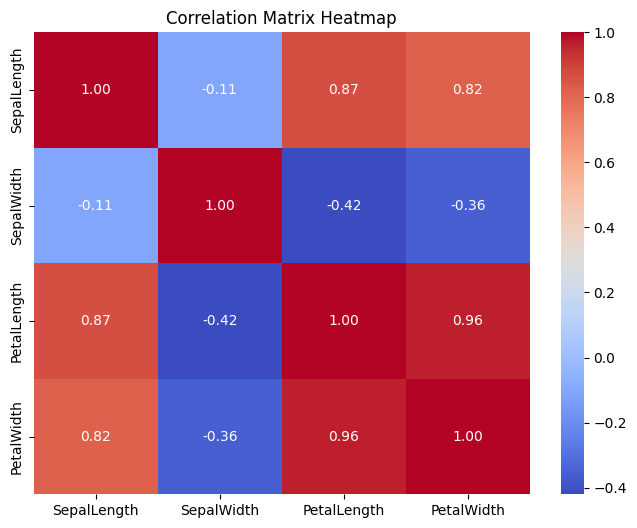

In [20]:
corr_matrix = ddf.corr().compute()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

## Step 9: Boxplot and Scatterplot

Task: Create a boxplot and scatterplot of the dataset.

Instruction: Generate a boxplot and scatterplot to explore the data distribution.

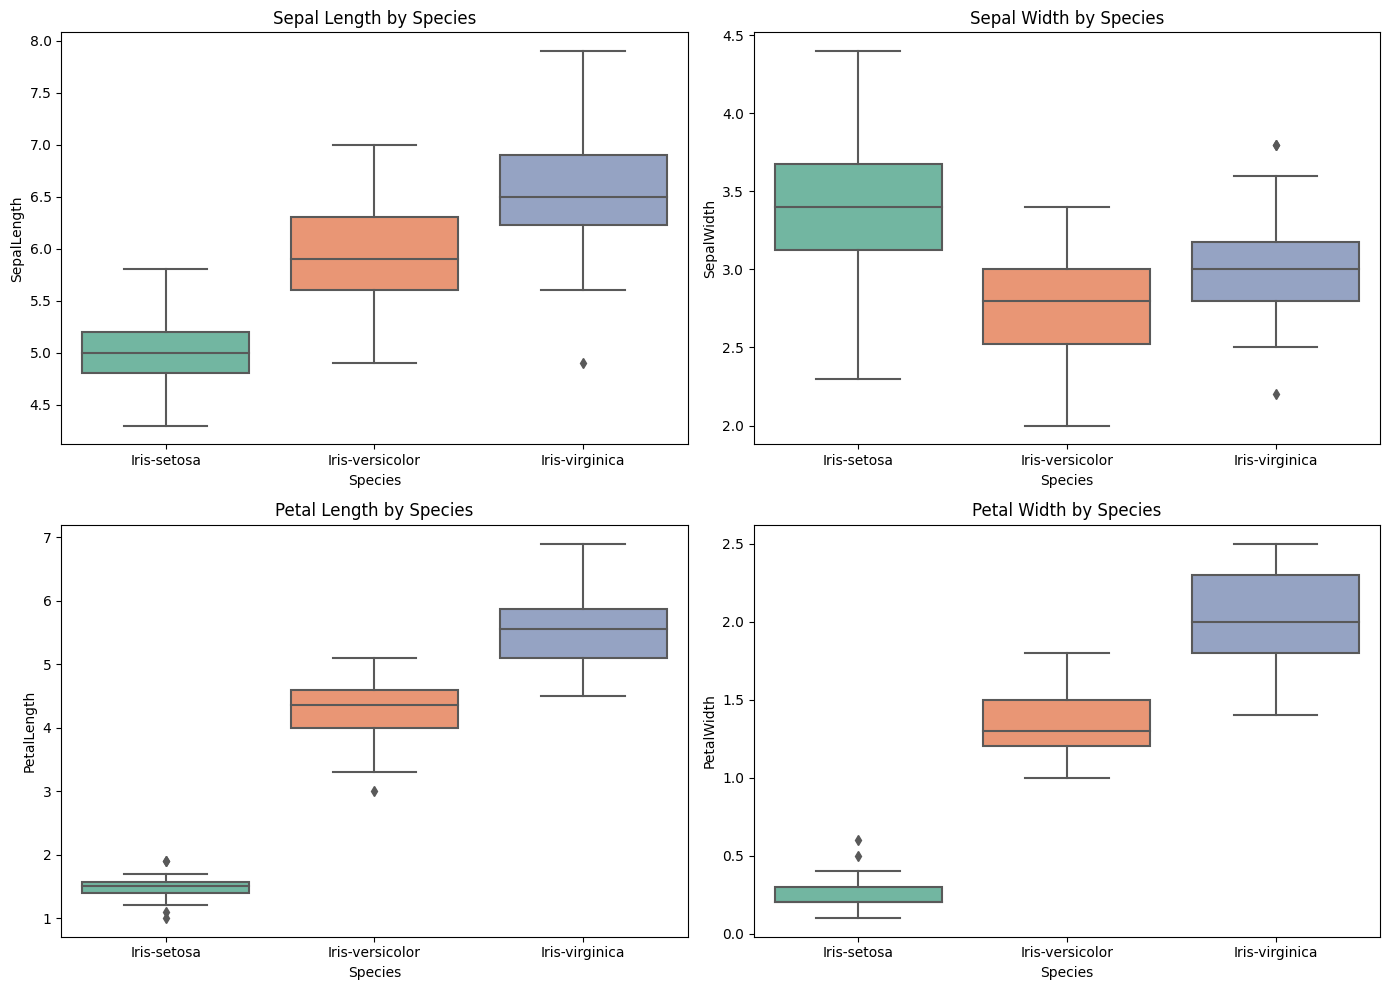

In [21]:
df = ddf.compute()

plt.figure(figsize=(14, 10))

#SepalLength
plt.subplot(2, 2, 1)
sns.boxplot(x=df.index, y='SepalLength', data=df, palette="Set2")
plt.title('Sepal Length by Species')

#SepalWidth
plt.subplot(2, 2, 2)
sns.boxplot(x=df.index, y='SepalWidth', data=df, palette="Set2")
plt.title('Sepal Width by Species')

# Petal Length
plt.subplot(2, 2, 3)
sns.boxplot(x=df.index, y='PetalLength', data=df, palette="Set2")
plt.title('Petal Length by Species')

# Petal Width
plt.subplot(2, 2, 4)
sns.boxplot(x=df.index, y='PetalWidth', data=df, palette="Set2")
plt.title('Petal Width by Species')

# Adjust layout
plt.tight_layout()
plt.show()

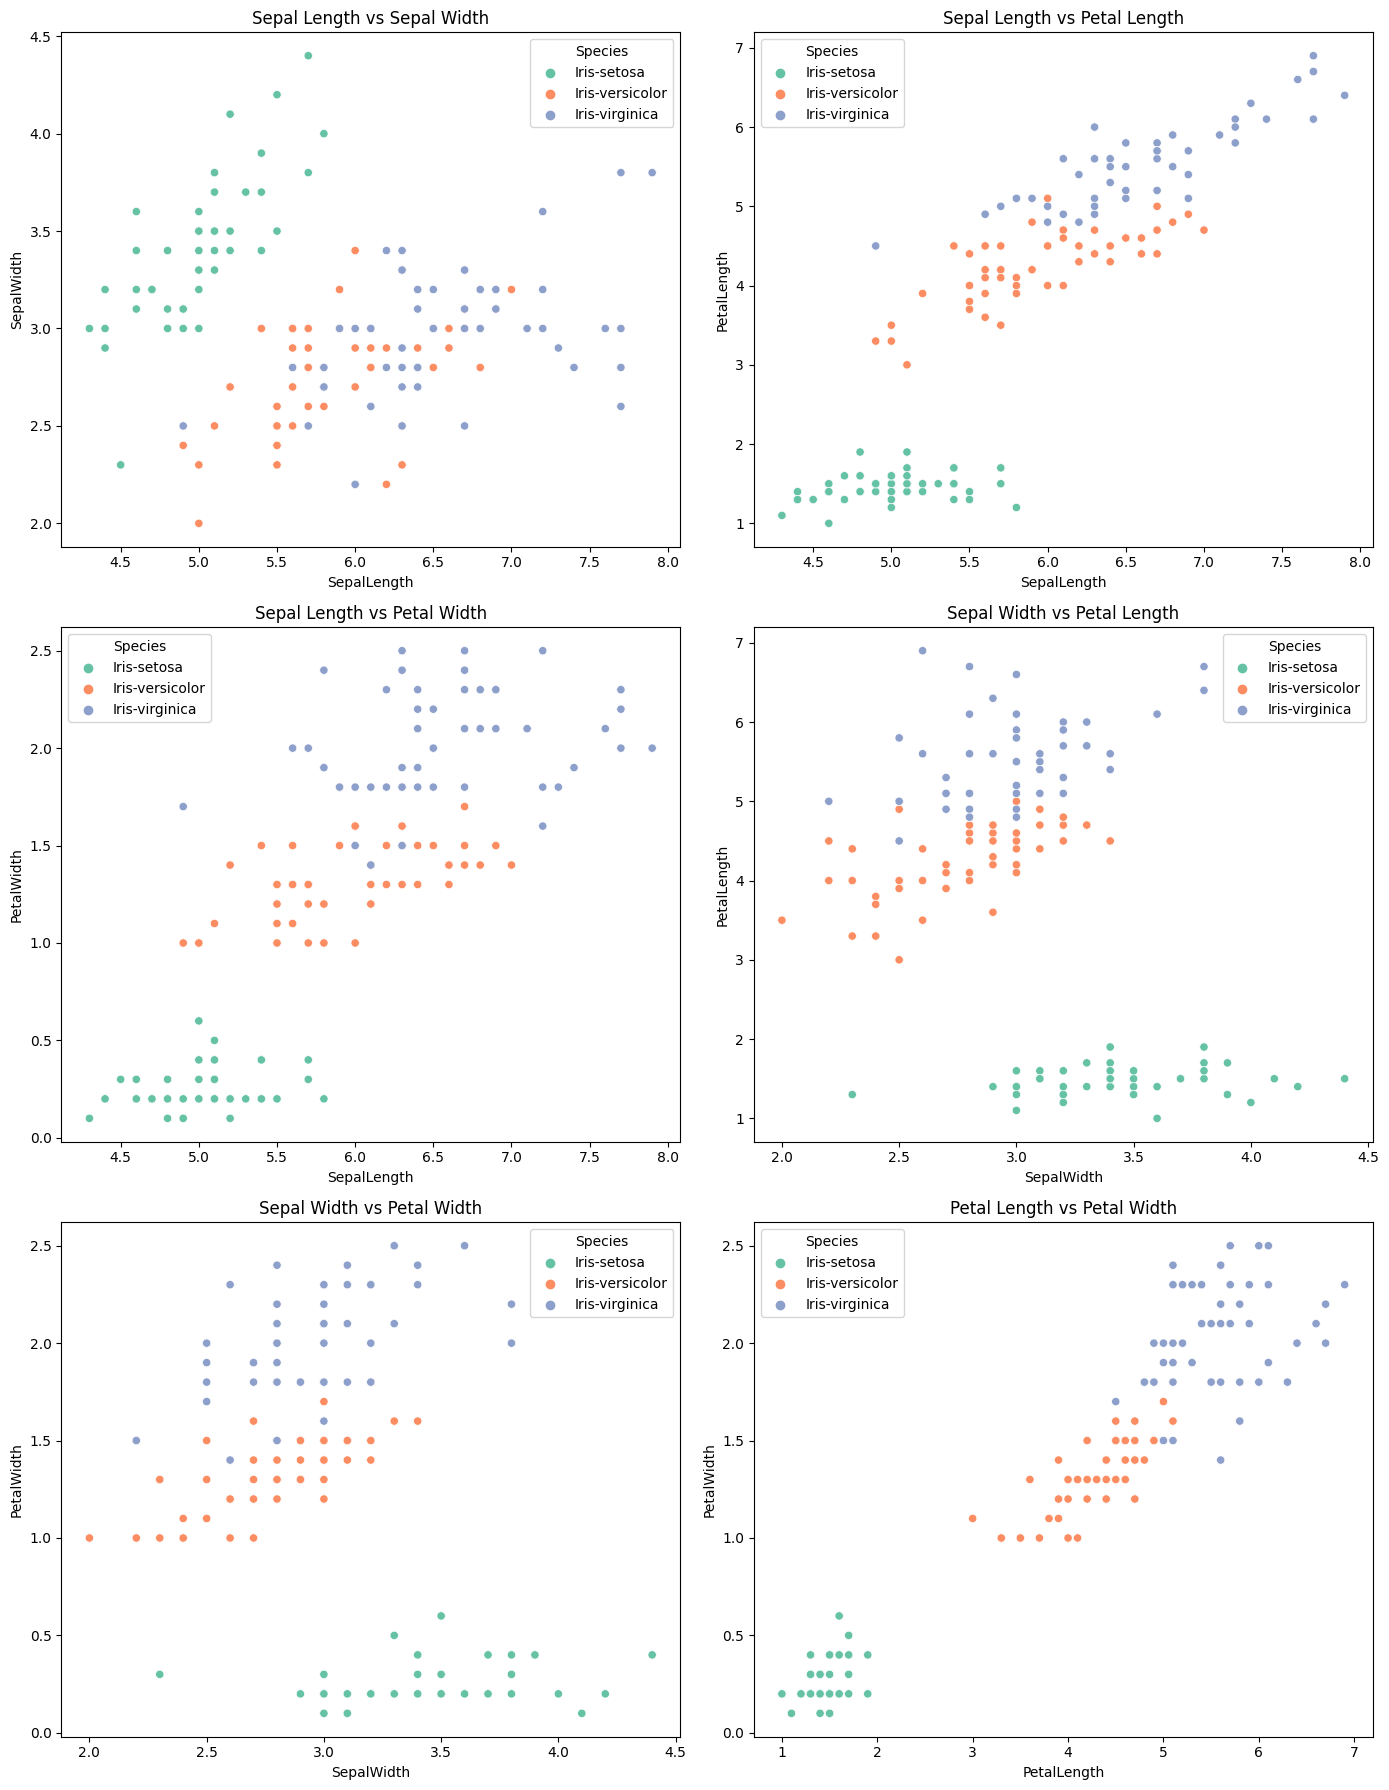

In [22]:
plt.figure(figsize=(14, 18))

# Sepal Length vs Sepal Width
plt.subplot(3, 2, 1)
sns.scatterplot(x='SepalLength', y='SepalWidth', hue='Species', data=df, palette='Set2')
plt.title('Sepal Length vs Sepal Width')

# Sepal Length vs Petal Length
plt.subplot(3, 2, 2)
sns.scatterplot(x='SepalLength', y='PetalLength', hue='Species', data=df, palette='Set2')
plt.title('Sepal Length vs Petal Length')

# Sepal Length vs Petal Width
plt.subplot(3, 2, 3)
sns.scatterplot(x='SepalLength', y='PetalWidth', hue='Species', data=df, palette='Set2')
plt.title('Sepal Length vs Petal Width')

# Sepal Width vs Petal Length
plt.subplot(3, 2, 4)
sns.scatterplot(x='SepalWidth', y='PetalLength', hue='Species', data=df, palette='Set2')
plt.title('Sepal Width vs Petal Length')

# Sepal Width vs Petal Width
plt.subplot(3, 2, 5)
sns.scatterplot(x='SepalWidth', y='PetalWidth', hue='Species', data=df, palette='Set2')
plt.title('Sepal Width vs Petal Width')

# Petal Length vs Petal Width
plt.subplot(3, 2, 6)
sns.scatterplot(x='PetalLength', y='PetalWidth', hue='Species', data=df, palette='Set2')
plt.title('Petal Length vs Petal Width')

plt.tight_layout()
plt.show()

## Step 10: Advanced Plots (3D and Hexbin)

Task: Create advanced visualizations such as a 3D plot and hexbin plot.

Instruction: Create a 3D scatter plot and a hexbin plot to visualize the relationship between petal length and width.

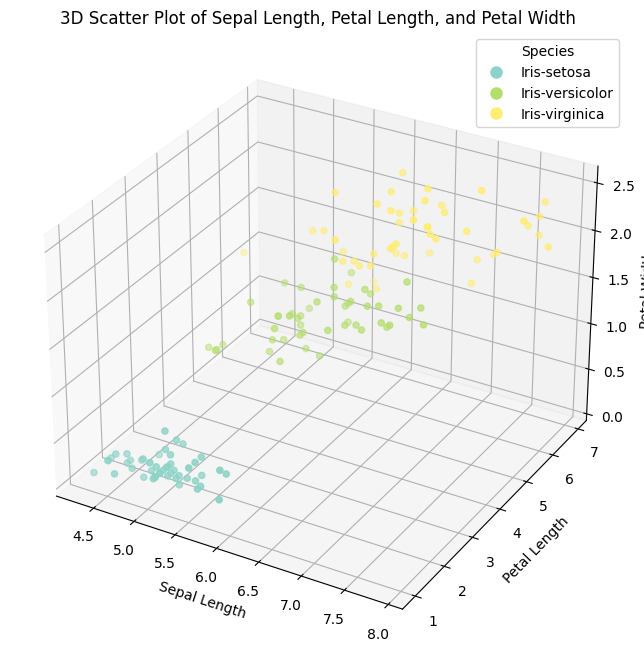

In [23]:
from mpl_toolkits.mplot3d import Axes3D

df.index = df.index.astype('category')

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot a 3D scatter plot using Sepal Length, Petal Length, and Petal Width
scatter = ax.scatter(df['SepalLength'], df['PetalLength'], df['PetalWidth'], c=df.index.codes, cmap='Set3')

# Set axis labels
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Petal Length')
ax.set_zlabel('Petal Width')
plt.title('3D Scatter Plot of Sepal Length, Petal Length, and Petal Width')

species_names = df.index.categories  # Get the species names from the categorical index
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(i)), markersize=10) 
                  for i in range(len(species_names))]
ax.legend(legend_handles, species_names, title="Species")

plt.show()

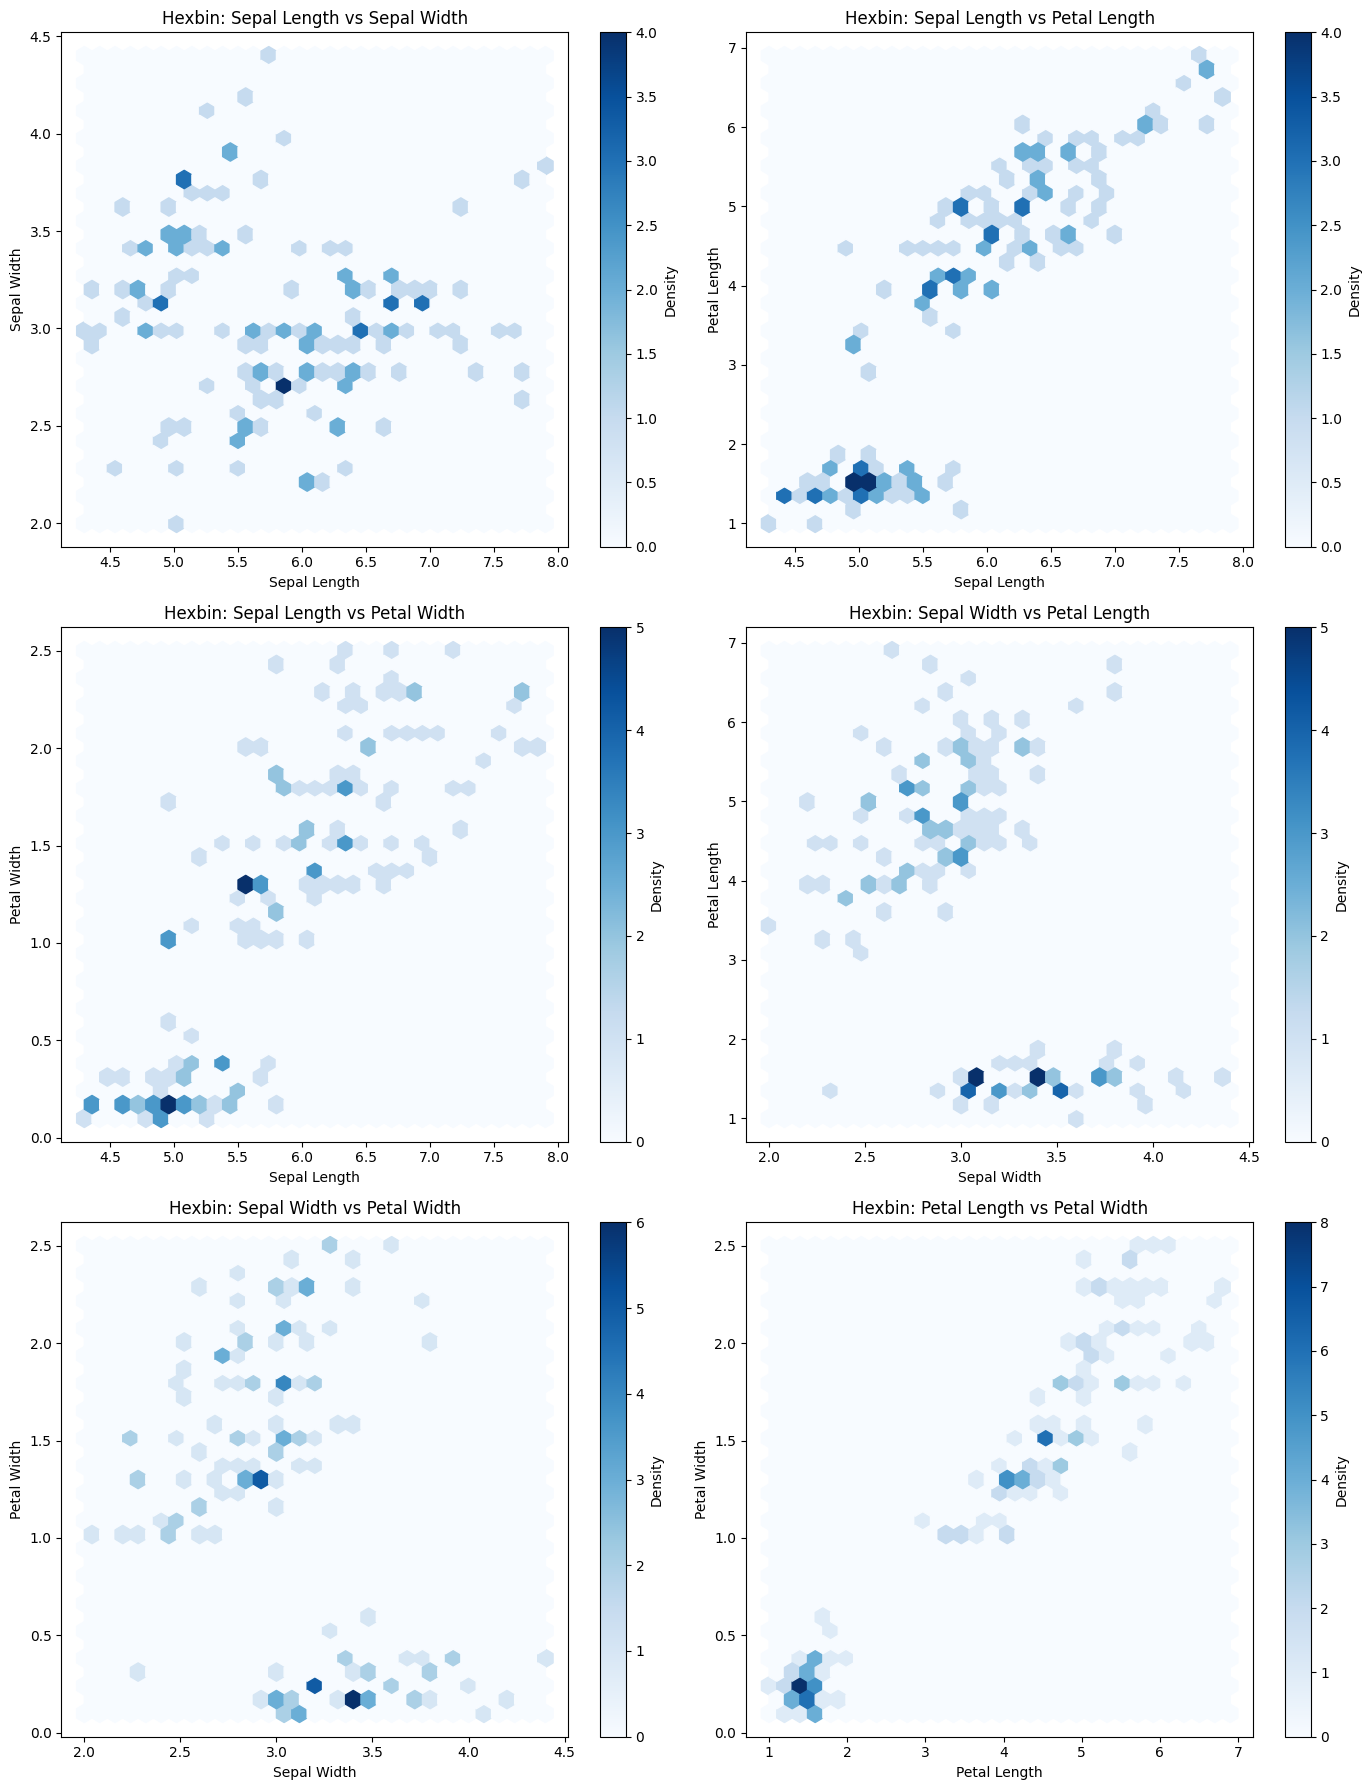

In [24]:
plt.figure(figsize=(14, 18))

# Sepal Length vs Sepal Width
plt.subplot(3, 2, 1)
plt.hexbin(df['SepalLength'], df['SepalWidth'], gridsize=30, cmap='Blues')
plt.colorbar(label='Density')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Hexbin: Sepal Length vs Sepal Width')

# Sepal Length vs Petal Length
plt.subplot(3, 2, 2)
plt.hexbin(df['SepalLength'], df['PetalLength'], gridsize=30, cmap='Blues')
plt.colorbar(label='Density')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Hexbin: Sepal Length vs Petal Length')

# Sepal Length vs Petal Width
plt.subplot(3, 2, 3)
plt.hexbin(df['SepalLength'], df['PetalWidth'], gridsize=30, cmap='Blues')
plt.colorbar(label='Density')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Width')
plt.title('Hexbin: Sepal Length vs Petal Width')

# Sepal Width vs Petal Length
plt.subplot(3, 2, 4)
plt.hexbin(df['SepalWidth'], df['PetalLength'], gridsize=30, cmap='Blues')
plt.colorbar(label='Density')
plt.xlabel('Sepal Width')
plt.ylabel('Petal Length')
plt.title('Hexbin: Sepal Width vs Petal Length')

# Sepal Width vs Petal Width
plt.subplot(3, 2, 5)
plt.hexbin(df['SepalWidth'], df['PetalWidth'], gridsize=30, cmap='Blues')
plt.colorbar(label='Density')
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.title('Hexbin: Sepal Width vs Petal Width')

# Petal Length vs Petal Width
plt.subplot(3, 2, 6)
plt.hexbin(df['PetalLength'], df['PetalWidth'], gridsize=30, cmap='Blues')
plt.colorbar(label='Density')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Hexbin: Petal Length vs Petal Width')

plt.tight_layout()
plt.show()

## Final Step: Closing the Dask Client

Task: Properly close the Dask Client when done.

Instruction: Always remember to close the Dask Client when you're finished with the tasks.

In [25]:
client.shutdown()